### leverage
- 종속변수 $ y $ 가 예측치 $y-hat$ 에 미치는 영향 

##### statsmodel을 이용한 레버리지 계산

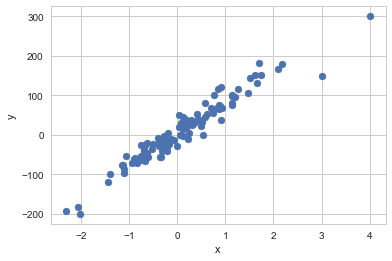

In [14]:
# 1차원 데이터 

from sklearn.datasets import make_regression

# 100개 데이터 생성
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, coef=True, random_state=1)

# leverage가 높은 가상의 데이터 추가
data_100 = (4,300)
data_101 = (3,150)
X0 = np.vstack([X0, np.array([data_100[:1], data_101[:1]])])
X = sm.add_constant(X0)
y = np.hstack([y, np.array([data_100[1],data_101[1]])])

plt.scatter(X0, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [15]:
model = sm.OLS(pd.DataFrame(y), pd.DataFrame(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           1.61e-61
Time:                        22:33:02   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.1

##### get_influence 메서드
- 일부러 조작한 두 데이터를 제외하면 대부분의 데이터는 leverage값이 0.02근처를 가진다.
- leverage합은 2 : 모수의 갯수

#### 표준화 잔차란?
- 잔차의 평균을 0으로 봤을 때 떨어진 거리

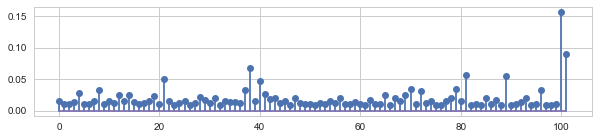

In [17]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10,2))
plt.stem(hat)
plt.show()

In [20]:
hat.sum()

2.0000000000000004

##### 레버리지 값이 0.05를 넘는 데이터만 큰 원으로 표시해보자

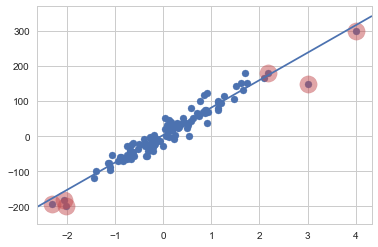

In [21]:
ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, ax=ax)

idx = hat > 0.05
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.show()